Reading data from CSV, data analysis, cleaning and transofrming to numeric form

In [1]:
#import bibliotek
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import math
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [96]:
data = pd.read_csv("LionsDen.csv", sep=";", decimal = ",")

In [97]:
data

,CUSTOMER_ID,APPLICATION_ID,DEFAULT_FLAG,APPLICATION_DATE,APPLICATION_HOUR,APPLICATION_WEEKDAY,APPLICATION_MONTH,APPLICATION_YEAR,PRODUCT_GROUP,LOAN_PERIOD,...,DPD,DPD_FALL_IN_12M,BIK_NUM_REQ_TOTAL_LZ3,BIK_NUM_REQ_TOTAL_LZ4_12,BIK_GRP,BIK_ACC_NUM_TOTAL_CLOSE,BIK_ACC_NUM_TOTAL_OPEN,BIK_BAL_TOTAL_OPEN,BIK_OVERDUE_12M_TOTAL_MAX,BIK_OVERDUE_EVER_TOTAL_MAX
0,102528122,362000000000.00,0,2017-05-10,24-lip,3,5,2017,CASH LOAN,96,...,0.00,4.00,2,3,CREDIT HISTORY (FULL DATA),5.00,9.00,19250.00,0.00,0.00
1,146634735,636000000000.00,0,2016-01-09,24-lip,7,1,2016,CASH LOAN,36,...,nan,8.00,2,2,CREDIT HISTORY (FULL DATA),1.00,2.00,10950.00,0.00,3244.00
2,996453767,695000000000.00,0,2016-07-07,24-lip,5,7,2016,OVERDRAFT,0,...,nan,1.00,1,0,CREDIT HISTORY (FULL DATA),3.00,1.00,4650.00,67.00,67.00
3,816020174,989000000000.00,0,2016-07-20,24-lip,3,7,2016,CASH LOAN,36,...,0.00,10.00,1,18,CREDIT HISTORY (FULL DATA),7.00,5.00,33300.00,0.00,1.00
4,930630805,77906299419.00,0,2015-06-30,24-lip,3,6,2015,CASH LOAN,5,...,0.00,0.00,3,9,CREDIT HISTORY (PART DATA),13.00,2.00,3100.00,0.00,0.00
5,825946053,723000000000.00,0,2016-08-22,24-lip,2,8,2016,CASH LOAN,96,...,0.00,1.00,2,3,CREDIT HISTORY (FULL DATA),2.00,1.00,1600.00,104.00,202.00
6,210093669,440000000000.00,0,2015-02-25,24-lip,5,2,2015,OVERDRAFT,0,...,0.00,0.00,1,3,CREDIT HISTORY (FULL DATA),3.00,1.00,650.00,0.00,2701.00
7,917727391,815000000000.00,0,2016-01-13,24-lip,3,1,2016,OVERDRAFT,0,...,nan,nan,1,2,CREDIT HISTORY (FULL DATA),4.00,0.00,0.00,0.00,4610.00
8,206449321,830000000000.00,0,2014-03-28,24-lip,5,3,2014,CASH LOAN,12,...,0.00,0.00,3,2,CREDIT HISTORY (FULL DATA),1.00,1.00,1400.00,0.00,643.00
9,82185541,347000000000.00,0,2016-01-02,24-lip,7,1,2016,CASH LOAN,10,...,0.00,7.00,1,1,CREDIT HISTORY (FULL DATA),3.00,2.00,11900.00,40.00,85.00


Data analysis

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79155 entries, 0 to 79154
Data columns (total 50 columns):
CUSTOMER_ID                      79155 non-null int64
APPLICATION_ID                   79155 non-null float64
DEFAULT_FLAG                     79155 non-null int64
APPLICATION_DATE                 79155 non-null object
APPLICATION_HOUR                 79155 non-null object
APPLICATION_WEEKDAY              79155 non-null int64
APPLICATION_MONTH                79155 non-null int64
APPLICATION_YEAR                 79155 non-null int64
PRODUCT_GROUP                    79155 non-null object
LOAN_PERIOD                      79155 non-null int64
CREDIT_AMOUNT                    79155 non-null int64
CUSTOMER_TYPE                    79155 non-null object
COOP_PERIOD                      79155 non-null int64
CREDIT_COOP_PERIOD               79155 non-null int64
AGE                              79155 non-null int64
AGE_BANDS                        79155 non-null object
EDUCATION           

In [63]:
null_counts = data.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
CUSTOMER_ID                          0
APPLICATION_ID                       0
DEFAULT_FLAG                         0
APPLICATION_DATE                     0
APPLICATION_HOUR                     0
APPLICATION_WEEKDAY                  0
APPLICATION_MONTH                    0
APPLICATION_YEAR                     0
PRODUCT_GROUP                        0
LOAN_PERIOD                          0
CREDIT_AMOUNT                        0
CUSTOMER_TYPE                        0
COOP_PERIOD                          0
CREDIT_COOP_PERIOD                   0
AGE                                  0
AGE_BANDS                            0
EDUCATION                            0
MARITAL_STATUS                       0
SPOUSE_PROPERTY_STATUS               0
OWNERSHIP                            0
NUMBER_OF_FAMILY_MEMBERS             0
MAIL_ADDR_SAME_AS_RESIDENTIAL        0
EMAIL_DOMAIN                         0
EMAIL_NAME_SURNAME                   0
MARKETING_CONSENT         

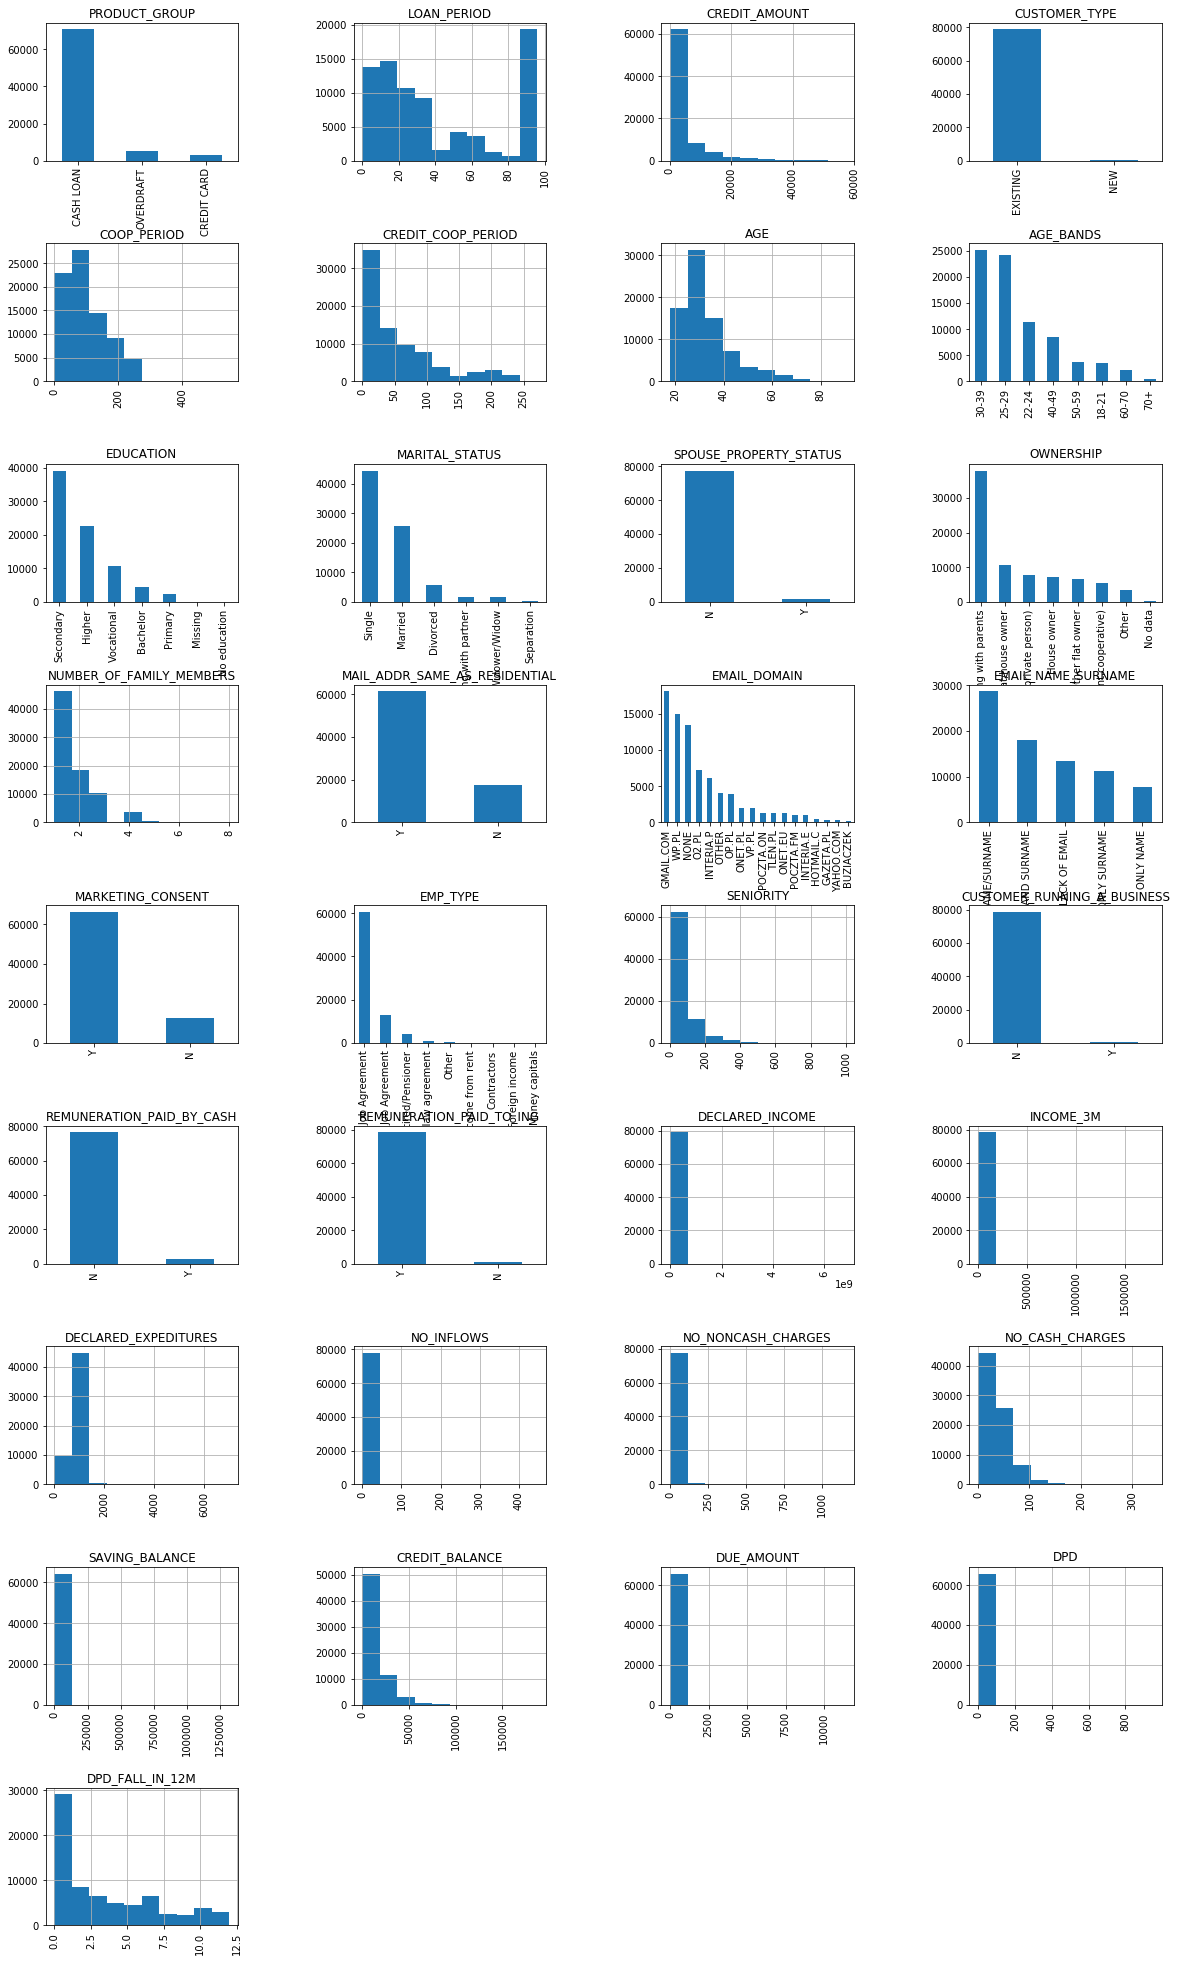

In [5]:
data_to_plot = data[[
 'PRODUCT_GROUP',
 'LOAN_PERIOD',
 'CREDIT_AMOUNT',
 'CUSTOMER_TYPE',
 'COOP_PERIOD',
 'CREDIT_COOP_PERIOD',
 'AGE',
 'AGE_BANDS',
 'EDUCATION',
 'MARITAL_STATUS',
 'SPOUSE_PROPERTY_STATUS',
 'OWNERSHIP',
 'NUMBER_OF_FAMILY_MEMBERS',
 'MAIL_ADDR_SAME_AS_RESIDENTIAL',
 'EMAIL_DOMAIN',
 'EMAIL_NAME_SURNAME',
 'MARKETING_CONSENT',
 'EMP_TYPE',
 'SENIORITY',
 'CUSTOMER_RUNNING_A_BUSINESS',
 'REMUNERATION_PAID_BY_CASH',
 'REMUNERATION_PAID_TO_ING',
 'DECLARED_INCOME',
 'INCOME_3M',
 'DECLARED_EXPEDITURES',
 'NO_INFLOWS',
 'NO_NONCASH_CHARGES',
 'NO_CASH_CHARGES',
 'SAVING_BALANCE',
 'CREDIT_BALANCE',
 'DUE_AMOUNT',
 'DPD',
 'DPD_FALL_IN_12M']]

fig=plt.figure(figsize=(20,35))
col=4
rows=math.ceil(float(data_to_plot.shape[1])/col)
for i, column in enumerate(data_to_plot.columns):
    ax=fig.add_subplot(rows,col, i+1)
    ax.set_title(column)
    if data_to_plot.dtypes[column]==np.object:
        data_to_plot[column].value_counts().plot(kind="bar", axes=ax)
    else:
        data_to_plot[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.6,wspace=0.6)

In [99]:
data_numerical = data[["INCOME_3M", "DECLARED_INCOME", "SAVING_BALANCE", "DECLARED_EXPEDITURES",
                      "CREDIT_BALANCE", "DUE_AMOUNT", "NO_NONCASH_CHARGES", "NO_CASH_CHARGES"]]
pd.options.display.float_format = "{:.2f}".format
data_numerical.describe()

,INCOME_3M,DECLARED_INCOME,SAVING_BALANCE,DECLARED_EXPEDITURES,CREDIT_BALANCE,DUE_AMOUNT,NO_NONCASH_CHARGES,NO_CASH_CHARGES
count,78384.00,79155.00,64496.00,54563.00,65876.00,65876.00,78384.00,78384.00
mean,8288.96,91034.33,2133.99,851.90,12404.07,7.04,22.78,35.13
std,12351.02,24181305.56,13767.83,265.17,14052.93,72.58,24.88,26.12
min,100.00,860.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,3600.00,2150.00,0.00,705.91,2470.00,0.00,9.00,16.00
50%,5600.00,2680.00,0.00,940.00,7400.00,0.00,14.00,30.00
75%,9200.00,3490.00,300.00,983.00,17670.00,0.00,26.00,48.00
max,1781100.00,6802954260.00,1320900.00,7000.00,187260.00,11370.00,1151.00,340.00


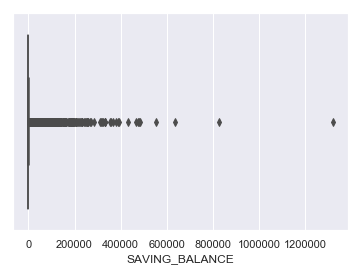

In [100]:
sns.boxplot(x=data['SAVING_BALANCE'])

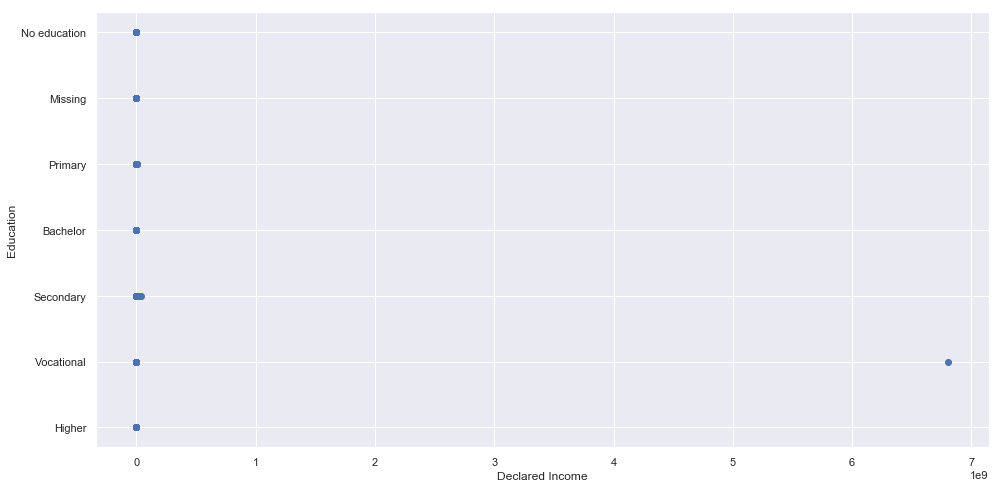

In [101]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(data['DECLARED_INCOME'], data['EDUCATION'])
ax.set_xlabel('Declared Income')
ax.set_ylabel('Education')
plt.show()

Removing outliers

In [102]:
outliers=[]
def detect_outlier(data_1):
    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [103]:
outlier_datapoints = detect_outlier(data["DECLARED_INCOME"])
print(outlier_datapoints)

[6802954260]


In [104]:
data.drop(data.loc[data['DECLARED_INCOME']==6802954260].index, inplace=True)

In [105]:
outlier_datapoints = detect_outlier(data["SAVING_BALANCE"])
print(len(outlier_datapoints))

578


In [106]:
data.drop(data.loc[data['SAVING_BALANCE']==1320900].index, inplace=True)

Filling missing data

In [107]:
list_average = ['DECLARED_INCOME', 'SAVING_BALANCE', 'NO_INFLOWS', 'INCOME_3M', 'DECLARED_EXPEDITURES',
               'CREDIT_BALANCE', 'NO_NONCASH_CHARGES', 'NO_CASH_CHARGES', 'CREDIT_BALANCE_TO_LIMIT']

for column in list_average:
    data[column] = data[column].fillna(data[column].mean())

In [108]:

data['SAVING_BALANCE'] = data['SAVING_BALANCE'].fillna(data.SAVING_BALANCE.mean())
data['NO_INFLOWS'] = data['NO_INFLOWS'].fillna(data.NO_INFLOWS.mean())
data['INCOME_3M'] = data['INCOME_3M'].fillna(data.INCOME_3M.mean())
data['DECLARED_EXPEDITURES'] = data['DECLARED_EXPEDITURES'].fillna(data.DECLARED_EXPEDITURES.mean())
data['CREDIT_BALANCE'] = data['CREDIT_BALANCE'].fillna(data.CREDIT_BALANCE.mean())
data['NO_NONCASH_CHARGES'] = data['NO_NONCASH_CHARGES'].fillna(data.NO_NONCASH_CHARGES.mean())
data['NO_CASH_CHARGES'] = data['NO_CASH_CHARGES'].fillna(data.NO_CASH_CHARGES.mean())
data['CREDIT_BALANCE_TO_LIMIT'] = data['CREDIT_BALANCE_TO_LIMIT'].fillna(data.CREDIT_BALANCE_TO_LIMIT.mean())

In [109]:
data['DUE_AMOUNT'] = data['DUE_AMOUNT'].fillna(0)
data['DPD'] = data['DPD'].fillna(0)
data['DPD_FALL_IN_12M'] = data['DPD_FALL_IN_12M'].fillna(0)
data['BIK_ACC_NUM_TOTAL_CLOSE'] = data['BIK_ACC_NUM_TOTAL_CLOSE'].fillna(0)
data['BIK_ACC_NUM_TOTAL_OPEN'] = data['BIK_ACC_NUM_TOTAL_OPEN'].fillna(0)
data['BIK_BAL_TOTAL_OPEN'] = data['BIK_BAL_TOTAL_OPEN'].fillna(0)
data['BIK_OVERDUE_12M_TOTAL_MAX'] = data['BIK_OVERDUE_12M_TOTAL_MAX'].fillna(0)
data['BIK_OVERDUE_EVER_TOTAL_MAX'] = data['BIK_OVERDUE_EVER_TOTAL_MAX'].fillna(0)

In [110]:
null_counts = data.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
CUSTOMER_ID                      0
APPLICATION_ID                   0
DEFAULT_FLAG                     0
APPLICATION_DATE                 0
APPLICATION_HOUR                 0
APPLICATION_WEEKDAY              0
APPLICATION_MONTH                0
APPLICATION_YEAR                 0
PRODUCT_GROUP                    0
LOAN_PERIOD                      0
CREDIT_AMOUNT                    0
CUSTOMER_TYPE                    0
COOP_PERIOD                      0
CREDIT_COOP_PERIOD               0
AGE                              0
AGE_BANDS                        0
EDUCATION                        0
MARITAL_STATUS                   0
SPOUSE_PROPERTY_STATUS           0
OWNERSHIP                        0
NUMBER_OF_FAMILY_MEMBERS         0
MAIL_ADDR_SAME_AS_RESIDENTIAL    0
EMAIL_DOMAIN                     0
EMAIL_NAME_SURNAME               0
MARKETING_CONSENT                0
EMP_TYPE                         0
SENIORITY                        0
CUSTOMER_RUNNING_

Zamiana danych na numeryczne

In [111]:
lb_make = LabelEncoder()
data['CUSTOMER_TYPE_CODE'] = lb_make.fit_transform(data[['CUSTOMER_TYPE']])
data['SPOUSE_PROPERTY_STATUS_CODE'] = lb_make.fit_transform(data[['SPOUSE_PROPERTY_STATUS']])
data['MAIL_ADDR_SAME_AS_RESIDENTIAL_CODE'] = lb_make.fit_transform(data[['MAIL_ADDR_SAME_AS_RESIDENTIAL']])
data['MARKETING_CONSENT_CODE'] = lb_make.fit_transform(data[['MARKETING_CONSENT']])
data['CUSTOMER_RUNNING_A_BUSINESS_CODE'] = lb_make.fit_transform(data[['CUSTOMER_RUNNING_A_BUSINESS']])
data['REMUNERATION_PAID_BY_CASH_CODE'] = lb_make.fit_transform(data[['REMUNERATION_PAID_BY_CASH']])
data['REMUNERATION_PAID_TO_ING_CODE'] = lb_make.fit_transform(data[['REMUNERATION_PAID_TO_ING']])

C:\Users\Kinga\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Kinga\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Kinga\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Kinga\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

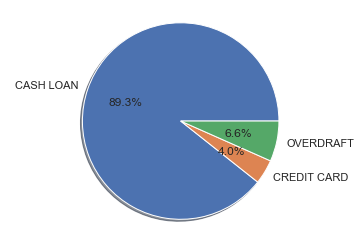

In [112]:
labels = data['PRODUCT_GROUP'].astype('category').cat.categories.tolist()
counts = data['PRODUCT_GROUP'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [113]:
data['cl_code'] = np.where(data['PRODUCT_GROUP'].str.contains('CASH LOAN'), 1, 0)

Text(0.5, 0, 'EDUCATION')

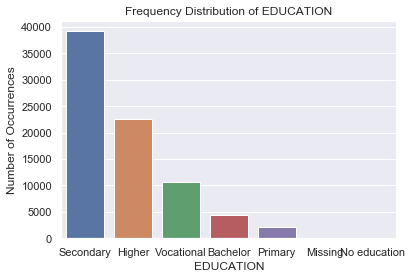

In [114]:
EDUCATION = data['EDUCATION'].value_counts()
sns.set(style="darkgrid")
sns.barplot(EDUCATION.index, EDUCATION.values)
plt.title('Frequency Distribution of EDUCATION')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('EDUCATION', fontsize=12)

In [115]:
Education_dict= {
        'Secondary': 2,
        'Higher': 3,
        'Vocational': 2,
        'Bachelor': 3,
        'Primary': 1,
        'Missing': 0,
        'No education': 0,
    }
data['education_code'] = data['EDUCATION'].map(Education_dict)

In [116]:
data = pd.get_dummies(data, columns=['OWNERSHIP'], prefix = ['OWNERSHIP'])
data = pd.get_dummies(data, columns=['MARITAL_STATUS'], prefix = ['MARITAL_STATUS'])
data = pd.get_dummies(data, columns=['EMAIL_DOMAIN'], prefix = ['EMAIL_DOMAIN'])
data = pd.get_dummies(data, columns=['EMAIL_NAME_SURNAME'], prefix = ['EMAIL_NAME_SURNAME'])
data = pd.get_dummies(data, columns=['EMP_TYPE'], prefix = ['EMP_TYPE'])
data = pd.get_dummies(data, columns=['BIK_GRP'], prefix = ['BIK_GRP'])

In [117]:
data.head()

,CUSTOMER_ID,APPLICATION_ID,DEFAULT_FLAG,APPLICATION_DATE,APPLICATION_HOUR,APPLICATION_WEEKDAY,APPLICATION_MONTH,APPLICATION_YEAR,PRODUCT_GROUP,LOAN_PERIOD,...,EMP_TYPE_Foreign income,EMP_TYPE_Income from rent,EMP_TYPE_Money capitals,EMP_TYPE_Other,EMP_TYPE_Permanent Job Agreement,EMP_TYPE_Retired/Pensioner,EMP_TYPE_Term Job Agreement,BIK_GRP_CREDIT HISTORY (PART DATA),BIK_GRP_CREDIT HISTORY (FULL DATA),BIK_GRP_NO CREDIT HISTORY
0,102528122,362000000000.00,0,2017-05-10,24-lip,3,5,2017,CASH LOAN,96,...,0,0,0,0,1,0,0,0,1,0
1,146634735,636000000000.00,0,2016-01-09,24-lip,7,1,2016,CASH LOAN,36,...,0,0,0,0,1,0,0,0,1,0
2,996453767,695000000000.00,0,2016-07-07,24-lip,5,7,2016,OVERDRAFT,0,...,0,0,0,0,0,0,1,0,1,0
3,816020174,989000000000.00,0,2016-07-20,24-lip,3,7,2016,CASH LOAN,36,...,0,0,0,0,0,0,1,0,1,0
4,930630805,77906299419.00,0,2015-06-30,24-lip,3,6,2015,CASH LOAN,5,...,0,0,0,0,1,0,0,1,0,0


In [118]:
lista_kolumn_do_usuniecia = ["EDUCATION", "PRODUCT_GROUP", "APPLICATION_ID",
                            "CUSTOMER_ID", "AGE_BANDS", 'CUSTOMER_TYPE', 'SPOUSE_PROPERTY_STATUS',
                            'MAIL_ADDR_SAME_AS_RESIDENTIAL', 'MARKETING_CONSENT', 'CUSTOMER_RUNNING_A_BUSINESS',
                            'REMUNERATION_PAID_BY_CASH', 'REMUNERATION_PAID_TO_ING', 'APPLICATION_DATE',
                            'APPLICATION_HOUR']

In [119]:
df_numeric = data.drop(lista_kolumn_do_usuniecia, axis =1)

In [120]:
df_numeric

,DEFAULT_FLAG,APPLICATION_WEEKDAY,APPLICATION_MONTH,APPLICATION_YEAR,LOAN_PERIOD,CREDIT_AMOUNT,COOP_PERIOD,CREDIT_COOP_PERIOD,AGE,NUMBER_OF_FAMILY_MEMBERS,...,EMP_TYPE_Foreign income,EMP_TYPE_Income from rent,EMP_TYPE_Money capitals,EMP_TYPE_Other,EMP_TYPE_Permanent Job Agreement,EMP_TYPE_Retired/Pensioner,EMP_TYPE_Term Job Agreement,BIK_GRP_CREDIT HISTORY (PART DATA),BIK_GRP_CREDIT HISTORY (FULL DATA),BIK_GRP_NO CREDIT HISTORY
0,0,3,5,2017,96,4200,44,34,29,1,...,0,0,0,0,1,0,0,0,1,0
1,0,7,1,2016,36,11100,52,39,25,1,...,0,0,0,0,1,0,0,0,1,0
2,0,5,7,2016,0,800,147,25,43,3,...,0,0,0,0,0,0,1,0,1,0
3,0,3,7,2016,36,5900,73,27,25,1,...,0,0,0,0,0,0,1,0,1,0
4,0,3,6,2015,5,1400,82,28,30,1,...,0,0,0,0,1,0,0,1,0,0
5,0,2,8,2016,96,47400,68,64,31,1,...,0,0,0,0,1,0,0,0,1,0
6,0,5,2,2015,0,4300,49,8,28,1,...,0,0,0,0,1,0,0,0,1,0
7,0,3,1,2016,0,1700,0,0,48,3,...,0,0,0,1,0,0,0,0,1,0
8,0,5,3,2014,12,1600,175,147,33,2,...,0,0,0,0,0,0,1,0,1,0
9,0,7,1,2016,10,800,116,91,30,1,...,0,0,0,0,1,0,0,0,1,0


In [182]:
df_numeric.shape

(79153, 88)

In [121]:
y = df_numeric["DEFAULT_FLAG"]
X = df_numeric.drop("DEFAULT_FLAG", axis = 1)

In [34]:
column_names = X.columns

In [127]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(X_train) #fitting only on train data, test data should be "unknown" for algorithm and while
#testing, should give the information about how the model will perform on new, unknown data

X_test_transformed = mms.transform(X_test)
X_train_transformed = mms.transform(X_train)


C:\Users\Kinga\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [38]:

X = pd.DataFrame(X, columns = column_names)

C:\Users\Kinga\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.01867805 0.02371094 0.01331243 0.02375591 0.02715451 0.04518067
 0.03243572 0.03419786 0.00987563 0.02976105 0.03361497 0.03808407
 0.02828812 0.0271627  0.03587543 0.04204837 0.01020043 0.03590321
 0.03618788 0.01895009 0.03194805 0.04014426 0.02321314 0.02105248
 0.0232583  0.02648529 0.03408751 0.03501373 0.03283894 0.00181947
 0.00117144 0.00556163 0.00411767 0.00040765 0.00599766 0.00648159
 0.00361786 0.00853621 0.00242999 0.00260876 0.00505924 0.00058214
 0.00234604 0.00234843 0.00305689 0.00396961 0.0016644  0.00156237
 0.00373408 0.00053135 0.00495113 0.00082549 0.0006001  0.00070072
 0.00548466 0.00171035 0.0015255  0.0039805  0.00387287 0.00428582
 0.00203094 0.00217958 0.00371946 0.00353546 0.00117796 0.00102247
 0.00143615 0.00282123 0.00517278 0.0001558  0.00342947 0.00608092
 0.00490585 0.00365177 0.00406441 0.00153283 0.000933   0.
 0.00081765 0.         0.00130513 0.00569276 0.00233153 0.00466263
 0.00320304 0.00470726 0.00146858]


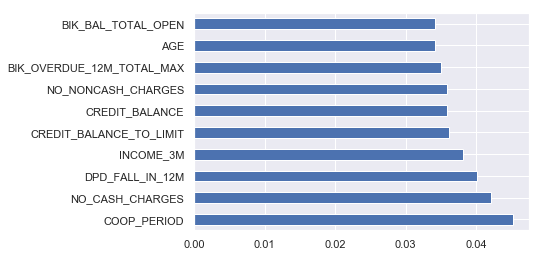

In [40]:
from sklearn.ensemble import RandomForestClassifier
names=list(X.columns.values)
rf=RandomForestClassifier(random_state=1)
rf.fit(X, y)
print(rf.feature_importances_)
fi=pd.Series(rf.feature_importances_, index=X.columns)
fi.nlargest(10).plot(kind='barh')
plt.show()

In [183]:
df_numeric["DEFAULT_FLAG"].value_counts()

0    75796
1     3357
Name: DEFAULT_FLAG, dtype: int64

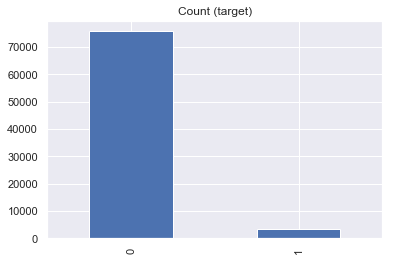

In [184]:
count_class_0, count_class_1 = df_numeric["DEFAULT_FLAG"].value_counts()
data_class_0=df_numeric[df_numeric["DEFAULT_FLAG"]==0]
data_class_1=df_numeric[df_numeric["DEFAULT_FLAG"]==1]

df_numeric["DEFAULT_FLAG"].value_counts().plot(kind='bar', title='Count (target)')

In [33]:
y = df_numeric["DEFAULT_FLAG"]
X = df_numeric.drop("DEFAULT_FLAG", axis = 1)

In [205]:
y.value_counts()

0    75796
1     3357
Name: DEFAULT_FLAG, dtype: int64

In [124]:
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=52, stratify=y)

In [128]:
X_train_transformed.max(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1.])

In [207]:
y_train.value_counts()

0    56846
1     2518
Name: DEFAULT_FLAG, dtype: int64

In [187]:
column_names = X_train.columns

In [188]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(X_train)

X_test_transformed = mms.transform(X_test)
X_train_transformed = mms.transform(X_train)

C:\Users\Kinga\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [189]:
X_train_transformed = pd.DataFrame(X_train_transformed, columns = column_names)
X_test_transformed = pd.DataFrame(X_test_transformed, columns = column_names)

In [190]:
X_train_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59364 entries, 0 to 59363
Data columns (total 87 columns):
APPLICATION_WEEKDAY                                  59364 non-null float64
APPLICATION_MONTH                                    59364 non-null float64
APPLICATION_YEAR                                     59364 non-null float64
LOAN_PERIOD                                          59364 non-null float64
CREDIT_AMOUNT                                        59364 non-null float64
COOP_PERIOD                                          59364 non-null float64
CREDIT_COOP_PERIOD                                   59364 non-null float64
AGE                                                  59364 non-null float64
NUMBER_OF_FAMILY_MEMBERS                             59364 non-null float64
SENIORITY                                            59364 non-null float64
DECLARED_INCOME                                      59364 non-null float64
INCOME_3M                                            59

In [73]:
optimalK = OptimalK(parallel_backend='rust')
optimalK

OptimalK(n_jobs=12, parallel_backend="None")

In [ ]:
#Sprawdzam optymalną liczbę kmeans etapami, aby się upewnić że znalazł centra globalne a nie lokalne

In [74]:
n_clusters = optimalK(X_train_transformed, cluster_array=np.arange(1, 30))
print('Optimal clusters: ', n_clusters)

Optimal clusters:  28


In [80]:
n_clusters = optimalK(X_train_transformed, cluster_array=np.arange(500, 700))
print('Optimal clusters: ', n_clusters)

C:\Users\Kinga\Anaconda3\lib\site-packages\scipy\cluster\vq.py:580: UserWarning: One of the clusters is empty. Re-run kmeans with a different initialization.
  warnings.warn("One of the clusters is empty. "


Optimal clusters:  699


In [81]:
from sklearn.cluster import KMeans

In [222]:
type(y_train)

pandas.core.series.Series

In [209]:
z= pd.DataFrame(y_train, index=np.arange(len(y_train)))

In [216]:
z["DEFAULT_FLAG"].value_counts

<bound method IndexOpsMixin.value_counts of 0       0.00
1       0.00
2        nan
3       0.00
4       0.00
5       0.00
6       0.00
7       0.00
8        nan
9       0.00
10      0.00
11      0.00
12      0.00
13      0.00
14      0.00
15      0.00
16      0.00
17      0.00
18      0.00
19      0.00
20      0.00
21      0.00
22      0.00
23      0.00
24      0.00
25      0.00
26      0.00
27      0.00
28      0.00
29      0.00
        ... 
59334   0.00
59335   0.00
59336   0.00
59337   0.00
59338   0.00
59339   0.00
59340   0.00
59341    nan
59342   0.00
59343   0.00
59344    nan
59345    nan
59346    nan
59347   0.00
59348   0.00
59349   0.00
59350   0.00
59351   0.00
59352   0.00
59353   0.00
59354   1.00
59355   0.00
59356   0.00
59357   0.00
59358   0.00
59359   0.00
59360   0.00
59361   0.00
59362   0.00
59363   0.00
Name: DEFAULT_FLAG, Length: 59364, dtype: float64>

In [199]:
X_train_transformed.head()

,APPLICATION_WEEKDAY,APPLICATION_MONTH,APPLICATION_YEAR,LOAN_PERIOD,CREDIT_AMOUNT,COOP_PERIOD,CREDIT_COOP_PERIOD,AGE,NUMBER_OF_FAMILY_MEMBERS,SENIORITY,...,EMP_TYPE_Foreign income,EMP_TYPE_Income from rent,EMP_TYPE_Money capitals,EMP_TYPE_Other,EMP_TYPE_Permanent Job Agreement,EMP_TYPE_Retired/Pensioner,EMP_TYPE_Term Job Agreement,BIK_GRP_CREDIT HISTORY (PART DATA),BIK_GRP_CREDIT HISTORY (FULL DATA),BIK_GRP_NO CREDIT HISTORY
0,0.83,0.00,0.00,0.06,0.01,0.28,0.56,0.21,0.00,0.03,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00
1,0.17,0.55,1.00,0.21,0.03,0.12,0.04,0.19,0.00,0.08,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00
2,0.67,0.82,0.33,0.59,0.07,0.39,0.33,0.42,0.29,0.02,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00
3,0.50,0.91,1.00,0.31,0.06,0.08,0.01,0.62,0.00,0.02,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00
4,0.50,0.82,1.00,1.00,0.01,0.21,0.33,0.14,0.00,0.04,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00


In [193]:
y_train == 0 #logiczny wektor, jak użyjemy do filtrowania X to wyciągnie wiersze gdzie warunek jest zspełniony

59224     True
29580     True
18834     True
58298     True
60249     True
25783     True
72212     True
75599     True
56463     True
10265     True
3895      True
16944     True
26674     True
59926     True
22033     True
66159     True
33650     True
41967     True
76753     True
32413     True
22784     True
44179     True
58904     True
26690     True
34610     True
46282     True
68368     True
40025     True
47161     True
20801     True
         ...  
1239      True
65978     True
54708     True
48721     True
35067     True
50996     True
44805     True
45821     True
48852     True
32597    False
24774     True
44601     True
34202     True
10081     True
72703     True
62403     True
49037     True
18989     True
173       True
16230    False
12417     True
9632      True
52225     True
41180     True
61507     True
70748     True
52579     True
42773     True
34755     True
60782     True
Name: DEFAULT_FLAG, Length: 59364, dtype: bool

In [263]:
import numpy as np
neg = X_train_transformed.loc[y_train.values == 0]
pos = X_train_transformed.loc[y_train.values == 1]

In [93]:
Sum_of_squared_distances = []
K = range(1,50)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(neg)
    Sum_of_squared_distances.append(km.inertia_)

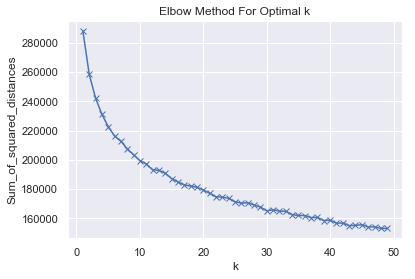

In [94]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [236]:
def Kmeans_reduction (neg, N=40):
    k_means = KMeans(n_clusters=N, random_state=0)
    k_means.fit(neg)
    return k_means.labels_ 

In [264]:
neg["cluster_label"] = Kmeans_reduction(neg)

C:\Users\Kinga\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [265]:
neg

,APPLICATION_WEEKDAY,APPLICATION_MONTH,APPLICATION_YEAR,LOAN_PERIOD,CREDIT_AMOUNT,COOP_PERIOD,CREDIT_COOP_PERIOD,AGE,NUMBER_OF_FAMILY_MEMBERS,SENIORITY,...,EMP_TYPE_Income from rent,EMP_TYPE_Money capitals,EMP_TYPE_Other,EMP_TYPE_Permanent Job Agreement,EMP_TYPE_Retired/Pensioner,EMP_TYPE_Term Job Agreement,BIK_GRP_CREDIT HISTORY (PART DATA),BIK_GRP_CREDIT HISTORY (FULL DATA),BIK_GRP_NO CREDIT HISTORY,cluster_label
0,0.83,0.00,0.00,0.06,0.01,0.28,0.56,0.21,0.00,0.03,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,4
1,0.17,0.55,1.00,0.21,0.03,0.12,0.04,0.19,0.00,0.08,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,7
2,0.67,0.82,0.33,0.59,0.07,0.39,0.33,0.42,0.29,0.02,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,6
3,0.50,0.91,1.00,0.31,0.06,0.08,0.01,0.62,0.00,0.02,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,6
4,0.50,0.82,1.00,1.00,0.01,0.21,0.33,0.14,0.00,0.04,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,32
5,0.33,0.73,1.00,0.00,0.02,0.13,0.00,0.17,0.14,0.07,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,10
6,0.17,0.36,0.67,1.00,0.35,0.08,0.05,0.12,0.00,0.06,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,14
7,0.00,0.64,0.00,0.08,0.01,0.16,0.07,0.11,0.00,0.02,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,35
8,0.83,1.00,0.67,1.00,0.14,0.15,0.03,0.11,0.00,0.01,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,9
9,0.17,0.09,0.00,0.62,0.02,0.12,0.06,0.11,0.00,0.07,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,16


In [266]:
pos.shape

(2518, 87)

In [267]:
number_of_neg = pos.shape[0] * 3

In [268]:
number_of_samples_from_one_cluster = round(number_of_neg / 40)

In [269]:
number_of_samples_from_one_cluster

189

In [270]:
neg["cluster_label"].value_counts()

24    2895
12    2305
25    2161
28    2148
39    2081
5     2017
14    1970
11    1909
33    1893
19    1764
7     1741
37    1641
4     1523
10    1522
30    1508
36    1493
21    1427
26    1420
17    1419
16    1404
2     1333
23    1331
38    1271
32    1253
1     1228
27    1206
9     1175
31    1157
34    1136
29    1087
6     1075
0      984
15     968
8      894
18     892
20     892
35     860
22     790
13     590
3      483
Name: cluster_label, dtype: int64

In [280]:
def samples_from_clusters (X, samples_per_cluster = 2, group_column = 'cluster_label', replace=False):
    fn = lambda obj: obj.loc[np.random.choice(obj.index, samples_per_cluster, replace=replace), :]
    X = X.groupby(group_column, as_index = False).apply(fn)
    return X

In [282]:
X_train_after_kmeans_clustering = samples_from_clusters(neg, number_of_samples_from_one_cluster)

In [283]:
X_train_after_kmeans_clustering.head()

APPLICATION_WEEKDAY  APPLICATION_MONTH  APPLICATION_YEAR  \
0 33485                 0.83               0.45              1.00   
  31327                 0.67               0.18              1.00   
  46598                 0.17               0.00              0.67   
  19045                 0.67               0.82              1.00   
  41083                 0.67               0.91              0.33   

         LOAN_PERIOD  CREDIT_AMOUNT  COOP_PERIOD  CREDIT_COOP_PERIOD  AGE  \
0 33485         0.00           0.07         0.20                0.40 0.36   
  31327         0.04           0.01         0.37                0.39 0.25   
  46598         0.25           0.04         0.43                0.40 0.44   
  19045         0.10           0.01         0.11                0.19 0.25   
  41083         0.25           0.02         0.32                0.65 0.57   

         NUMBER_OF_FAMILY_MEMBERS  SENIORITY  ...  EMP_TYPE_Income from rent  \
0 33485                      0.14       0.24  ...                       0.00   
  31327                      0.14       0.13  ...                       0.00   
  46598                      0.14       0.12  ...                       0.00   
  19045                      0.29       0.06  ...                       0.00   
  41083                      0.14       0.26  ...                       0.00   

         EMP_TYPE_Money capitals  EMP_TYPE_Other  \
0 33485                     0.00            0.00   
  31327                     0.00            0.00   
  46598                     0.00            0.00   
  19045                     0.00            0.00   
  41083                     0.00            0.00   

         EMP_TYPE_Permanent Job Agreement  EMP_TYPE_Retired/Pensioner  \
0 33485                              1.00                        0.00   
  31327                              1.00                        0.00   
  46598                              1.00                        0.00   
  19045                              1.00                        0.00   
  41083                              1.00                        0.00   

         EMP_TYPE_Term Job Agreement  BIK_GRP_CREDIT HISTORY  (PART DATA)  \
0 33485                         0.00                                 0.00   
  31327                         0.00                                 0.00   
  46598                         0.00                                 0.00   
  19045                         0.00                                 0.00   
  41083                         0.00                                 0.00   

         BIK_GRP_CREDIT HISTORY (FULL DATA)  BIK_GRP_NO CREDIT HISTORY  \
0 33485                                1.00                       0.00   
  31327                                1.00                       0.00   
  46598                                1.00                       0.00   
  19045                                1.00                       0.00   
  41083                                1.00                       0.00   

         cluster_label  
0 33485              0  
  31327              0  
  46598              0  
  19045              0  
  41083              0  

[5 rows x 88 columns]

In [285]:
X_train_after_kmeans_clustering["Default_label"] = 0
pos["Default_label"] = 1

C:\Users\Kinga\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [286]:
New_Data_Train = pd.concat([X_train_after_kmeans_clustering, pos])

C:\Users\Kinga\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [288]:
New_Data_Train.columns

Index(['AGE', 'APPLICATION_MONTH', 'APPLICATION_WEEKDAY', 'APPLICATION_YEAR',
       'BIK_ACC_NUM_TOTAL_CLOSE', 'BIK_ACC_NUM_TOTAL_OPEN',
       'BIK_BAL_TOTAL_OPEN', 'BIK_GRP_CREDIT HISTORY  (PART DATA)',
       'BIK_GRP_CREDIT HISTORY (FULL DATA)', 'BIK_GRP_NO CREDIT HISTORY',
       'BIK_NUM_REQ_TOTAL_LZ3', 'BIK_NUM_REQ_TOTAL_LZ4_12',
       'BIK_OVERDUE_12M_TOTAL_MAX', 'BIK_OVERDUE_EVER_TOTAL_MAX',
       'COOP_PERIOD', 'CREDIT_AMOUNT', 'CREDIT_BALANCE',
       'CREDIT_BALANCE_TO_LIMIT', 'CREDIT_COOP_PERIOD',
       'CUSTOMER_RUNNING_A_BUSINESS_CODE', 'CUSTOMER_TYPE_CODE',
       'DECLARED_EXPEDITURES', 'DECLARED_INCOME', 'DPD', 'DPD_FALL_IN_12M',
       'DUE_AMOUNT', 'Default_label', 'EMAIL_DOMAIN_BUZIACZEK',
       'EMAIL_DOMAIN_GAZETA.PL', 'EMAIL_DOMAIN_GMAIL.COM',
       'EMAIL_DOMAIN_HOTMAIL.C', 'EMAIL_DOMAIN_INTERIA.E',
       'EMAIL_DOMAIN_INTERIA.P', 'EMAIL_DOMAIN_NONE', 'EMAIL_DOMAIN_O2.PL',
       'EMAIL_DOMAIN_ONET.EU', 'EMAIL_DOMAIN_ONET.PL', 'EMAIL_DOMAIN_OP.PL',
     

In [ ]:
#do wykorzystania do feature reduction

from sklearn.svm import LinearSVC
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)
X_new.shape
(150, 3)

In [2]:
from gap_statistic import OptimalK

C:\Users\Kinga\Anaconda3\lib\site-packages\gap_stat-1.0.1-py3.6.egg\gap_statistic\optimalK.py:13: UserWarning: joblib not installed, will be unavailable as a backend for parallel processing.


In [ ]:
#Import Library
from sklearn.cluster import KMeans
#Assumed you have, X (attributes) for training data set and x_test(attributes) of test_dataset
# Create KNeighbors classifier object model 
k_means = KMeans(n_clusters=3, random_state=0)
# Train the model using the training sets and check score
model.fit(X_train_transformed)
#Predict Output
predicted= model.predict(x_test)

In [ ]:
data_class_0_under=data_class_0.sample(count_class_1)
data_under=pd.concat([data_class_0_under, data_class_1], axis=0)
print(data_under["DEFAULT_FLAG"].value_counts())

data_under["DEFAULT_FLAG"].value_counts().plot(kind='bar', title='Count (target)')

In [ ]:
y = data_under["DEFAULT_FLAG"]
X = data_under.drop("DEFAULT_FLAG", axis = 1)

In [58]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MaxAbsScaler
from sklearn.feature_extraction.text import CountVectorizer
import pprint
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import  metrics

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
import pprint
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.preprocessing import MinMaxScaler # inne sposoby
from sklearn.preprocessing import MaxAbsScaler
import numpy as np
import time


# zdefiniować modele, ich możliwe parametry do tunowania
uses = [True, True, True, True, True, True, True, True, True, True, True]

names = ["Regresja logistyczna", "MaxAbsScaler - Regresja logistyczna", 
         "StandardScaler - Regresja logistyczna", "Drzewo decyzyjne",
         "Naiwny Bayes", "MaxAbs_SVC", "SVC", "Standard_SVC", "BaggingClassifier_tree", "BaggingClassifier_logistic", "RandomForestClassifier"]

models = [
             [("model",LogisticRegression())],
             [("scaler", MaxAbsScaler()),("model",LogisticRegression())],
             [("scaler", StandardScaler()),("model",LogisticRegression())],
             [("model", DecisionTreeClassifier())],
             [("model", MultinomialNB())],
             [("scaler", MaxAbsScaler()),("model", SVC())],
             [("model", SVC())],
             [("scaler", StandardScaler()),("model", SVC())],
             [("model", BaggingClassifier())],
             [("model", BaggingClassifier(LogisticRegression()))],
             [("model", RandomForestClassifier())]
         ]

parameters = [{"model__C": [0.01, 0.5, 1, 5, 10, 20, 1000], "model__penalty": ["l1", "l2"]},
              {"model__C": [0.01, 0.5, 1, 5, 10, 20, 1000], "model__penalty": ["l1", "l2"]},
              {"model__C": [0.01, 0.5, 1, 5, 10, 20, 1000], "model__penalty": ["l1", "l2"]},
              {"model__criterion":["gini", "entropy"]},
              {},
              [{"model__C": [0.01, 1, 100, 1000],
                "model__kernel":["poly"],
                "model__degree": [2,3]
               },
               {"model__C": [0.01, 1, 100, 1000],
                "model__kernel":["rbf"],
                "model__gamma": [0.1,1,10]
               },
               {"model__C": [0.01, 1, 100, 1000],
                "model__kernel":["linear"]
               }],
              [{"model__C": [0.01, 1, 100, 1000],
                "model__kernel":["poly"],
                "model__degree": [2,3]
               },
               {"model__C": [0.01, 1, 100, 1000],
                "model__kernel":["rbf"],
                "model__gamma": [0.1,1,10, 1000]
               },
               {"model__C": [0.01, 1, 100, 1000],
                "model__kernel":["linear"]
               }],
              [
                  {"model__C": [0.01,  100],
                "model__kernel":["poly"],
                "model__degree": [2,3]
#                },
#                {"model__C": [0.01,  100,],
#                 "model__kernel":["rbf"]
               },
               {"model__C": [100, 1000],
                "model__kernel":["linear"]
               }],
              {
                  "model__n_estimators": [50, 100, 200],#[2, 10, 100, 200],
                  "model__max_features": [ 0.7, 0.85],#[0.2, 0.5, 0.8, 1.0],
                  "model__max_samples": [ 0.7, 0.85], #[0.2, 0.5, 0.8, 1.0],
                  "model__bootstrap": [True] #[False, True]
              },
              {
                  "model__n_estimators": [50, 100, 200],#[2, 10, 100, 200],
                  "model__max_features": [0.8, 1.0],#[0.2, 0.5, 0.8, 1.0],
                  "model__max_samples": [0.8, 1.0], #[0.2, 0.5, 0.8, 1.0],
                  "model__bootstrap": [True] #[False, True]
              },
              {
                  "model__n_estimators": [2, 100],# [2, 10, 100, 200],
                  "model__bootstrap": [True] #[False, True]
              }
              ]

if len(names) != len(models) or len(models) != len(parameters) or len(parameters) != len(uses):
    print("len(names)", len(names))
    print("len(models)", len(models))
    print("len(parameters)", len(parameters))
    print("len(uses)", len(uses))
    raise ValueError("Listy wejściowe nie są równej długości!")

best_models = []
best_params = []

for use, name, model, parameter in zip(uses, names, models, parameters):
    if not use:
        best_models.append(99)
        best_params.append(99)
        continue
    print("Tunuję model:", name)
    pipe = Pipeline(model)
    start = time.time()
    gs = GridSearchCV(pipe, parameter, cv=10, n_jobs=-1)
    gs.fit(X_train, y_train)
    end = time.time()
    
    for mean, std, params, fittime, scoretime in zip(gs.cv_results_["mean_test_score"], gs.cv_results_["std_test_score"], gs.cv_results_["params"], gs.cv_results_["mean_fit_time"], gs.cv_results_["mean_score_time"]):
        print("mean: ", np.round(mean, 3), ", std: ", np.round(std, 3), " ", params, " fit time: ", np.round(fittime, 3), " score time: ", np.round(scoretime, 3), sep="")
    
    print("end - start: ", end-start)
    print("z gs: ", 10 * (gs.cv_results_["mean_fit_time"]+gs.cv_results_["mean_score_time"]).sum())
    
    best_models.append(gs.best_estimator_)
    best_params.append(gs.best_params_)

print("")
print("Wyniki na testowym:")
for use, name, best_model, best_param in zip(uses, names, best_models, best_params):
    if not use:
        continue
    print(name, " (", best_param, "):", accuracy_score(best_model.predict(X_test), y_test), sep="")

In [ ]:
# Create logistic regression object
#model = LogisticRegression()
parameter = {"model__C": [0.01, 1000], "model__penalty": ["l1", "l2"]}
model = [("scaler", MaxAbsScaler()),("model",LogisticRegression())]
pipe = Pipeline(model)
gs = GridSearchCV(pipe, parameter, cv=10, n_jobs=-1, verbose= 10)
gs.fit(X_train, y_train)
# Train the model using the training sets and check score
#model.fit(X_train, y_train)
#model.score(X_train, y_train)
#Equation coefficient and Intercept

#Predict Output
print("R^2: {}".format(metrics.accuracy_score(y_train, gs.predict(X_train))))

In [ ]:
#Import Library
#Import other necessary libraries like pandas, numpy...
from sklearn import tree
#Assumed you have, X (predictor) and Y (target) for training data set and x_test(predictor) of test_dataset
# Create tree object 
model = tree.DecisionTreeClassifier(criterion='gini') # for classification, here you can change the algorithm as gini or entropy (information gain) by default it is gini  
# model = tree.DecisionTreeRegressor() for regression
# Train the model using the training sets and check score
model.fit(X_train, y_train)
#Predict Output
print("R^2: {}".format(metrics.accuracy_score(y_train, model.predict(X_train))))
print("R^2: {}".format(metrics.accuracy_score(y_test, model.predict(X_test))))

In [ ]:
#Import Library
from sklearn import svm
#Assumed you have, X (predictor) and Y (target) for training data set and x_test(predictor) of test_dataset
# Create SVM classification object 
model = svm.SVC() # there is various option associated with it, this is simple for classification. You can refer link, for mo# re detail.
# Train the model using the training sets and check score
model.fit(X_train, y_train)

#Predict Output
print("R^2: {}".format(metrics.r2_score(y_train, model.predict(X_train))))
print("R^2: {}".format(metrics.r2_score(y_test, model.predict(X_test))))

In [ ]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

In [ ]:
BaggingClassifier(max_samples=0.5,
                  max_features=0.5,
                  bootstrap = False,
                  bootstrap_features = False)

In [ ]:
data[['SAVING_BALANCE']].groupby(data['EDUCATION']).mean()

In [ ]:
data[['DECLARED_INCOME']].groupby(data['EDUCATION']).mean()

In [ ]:
def split_mean(x):
    split_list = x.split('-')
    mean = (float(split_list[0])+float(split_list[1]))/2
    return mean

data['age_mean'] = data["AGE_BANDS"].apply(lambda x: split_mean(x))

data.head()